In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# df = pd.read_csv("/content/drive/MyDrive/Arima/interest-window-rolling.csv", encoding='CP949')
df = pd.read_csv("/content/drive/MyDrive/Arima/interest-window-rolling.csv")
# df = df.drop(df.columns[0], axis=1)
df.columns = ["date","trend", "records_count"]
df.head()

,date,trend,records_count
0,1987-02-01,0.124217,8
1,1987-03-01,0.123643,9
2,1987-04-01,0.053719,10
3,1987-05-01,0.055789,11
4,1987-06-01,0.061176,12


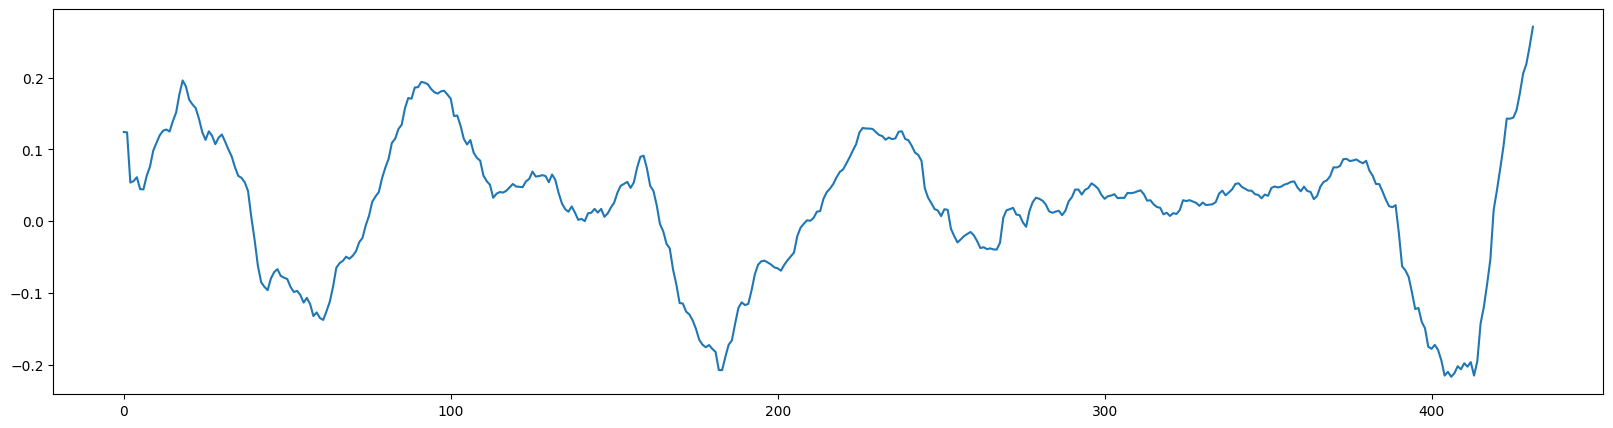

In [4]:
plt.figure(figsize=(20,5))
plt.plot(range(len(df["date"])), df["trend"])
plt.show()

In [5]:
df_train = df.iloc[:-8*12]
df_test = df.iloc[-8*12:]

print(df_test)

           date     trend  records_count
336  2015-02-01  0.042488             24
337  2015-03-01  0.035968             24
338  2015-04-01  0.039925             24
339  2015-05-01  0.044285             24
340  2015-06-01  0.051818             24
..          ...       ...            ...
427  2022-09-01  0.177748             21
428  2022-10-01  0.205453             20
429  2022-11-01  0.218945             19
430  2022-12-01  0.243336             18
431  2023-01-01  0.270912             17

[96 rows x 3 columns]


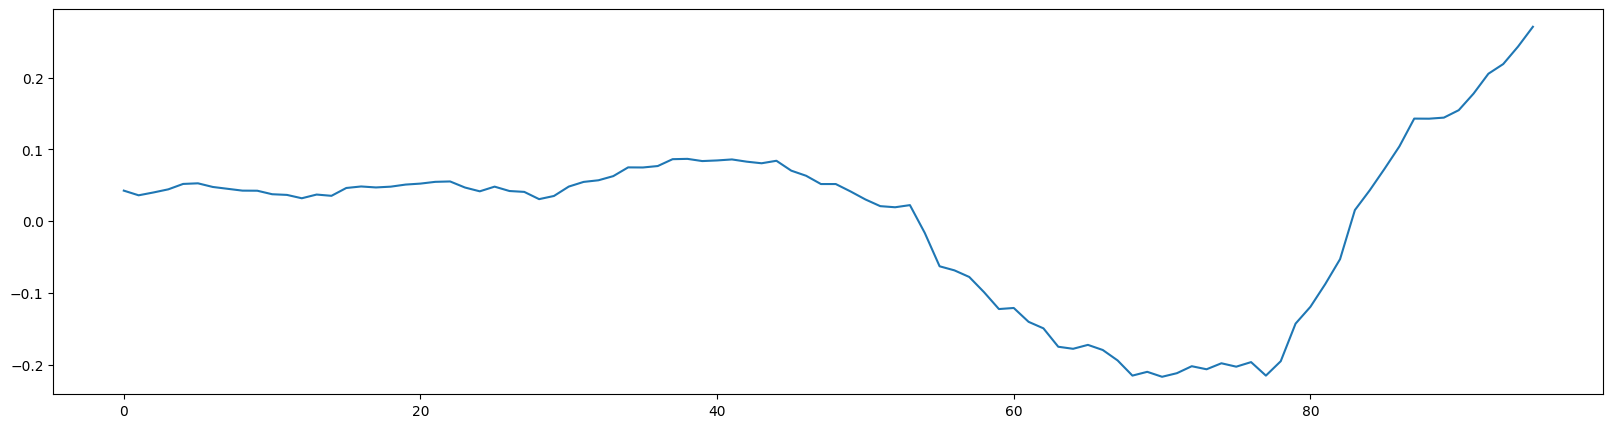

In [6]:
plt.figure(figsize=(20,5))
plt.plot(range(len(df_test["date"])), df_test["trend"])
plt.show()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

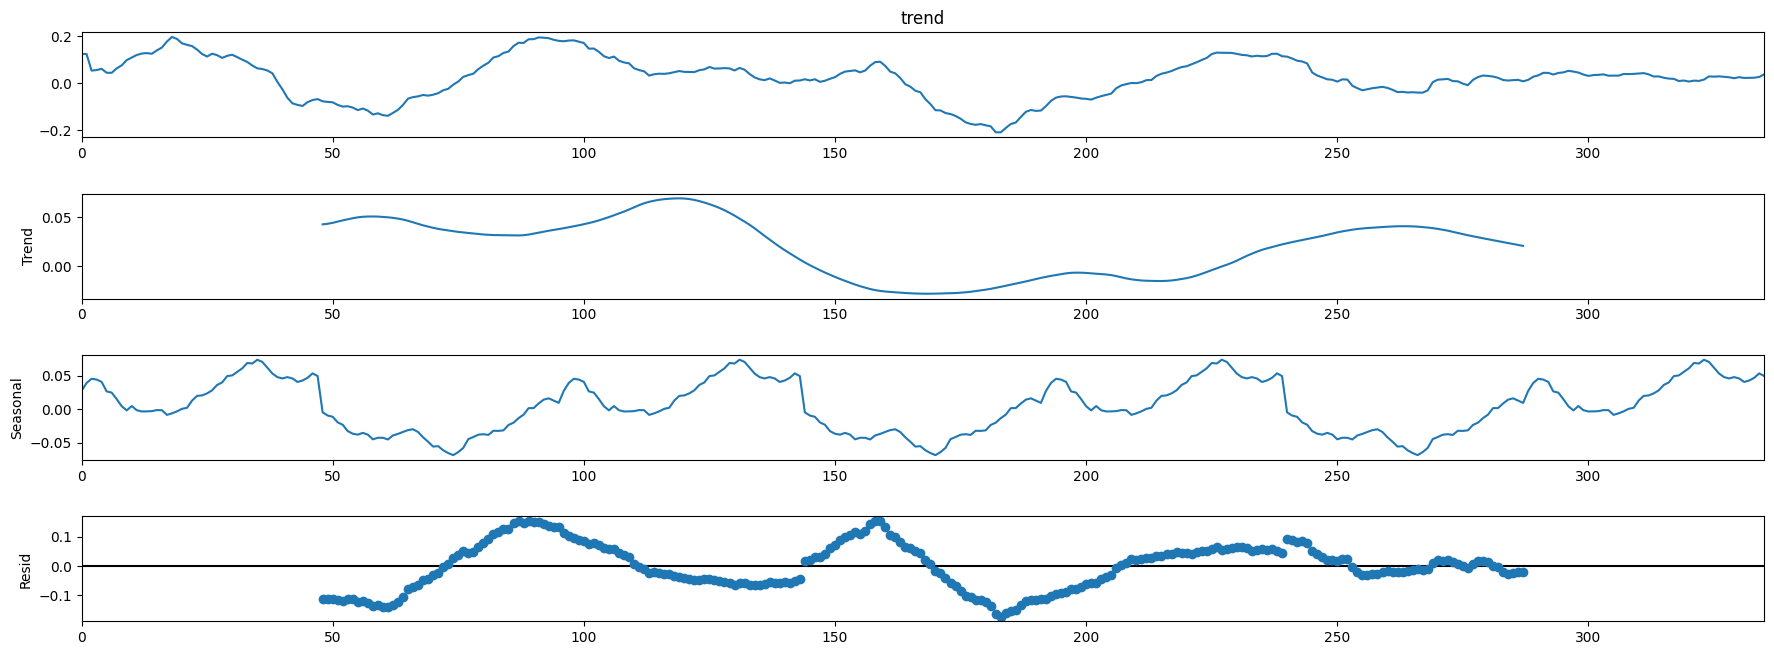

In [9]:
result = seasonal_decompose(df_train["trend"], model="additive", period=12*8)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,7)
plt.show()

In [ ]:
print(df_train['trend'])

0      0.124217
1      0.123643
2      0.053719
3      0.055789
4      0.061176
         ...   
331    0.022425
332    0.022857
333    0.023481
334    0.026603
335    0.038187
Name: trend, Length: 336, dtype: float64


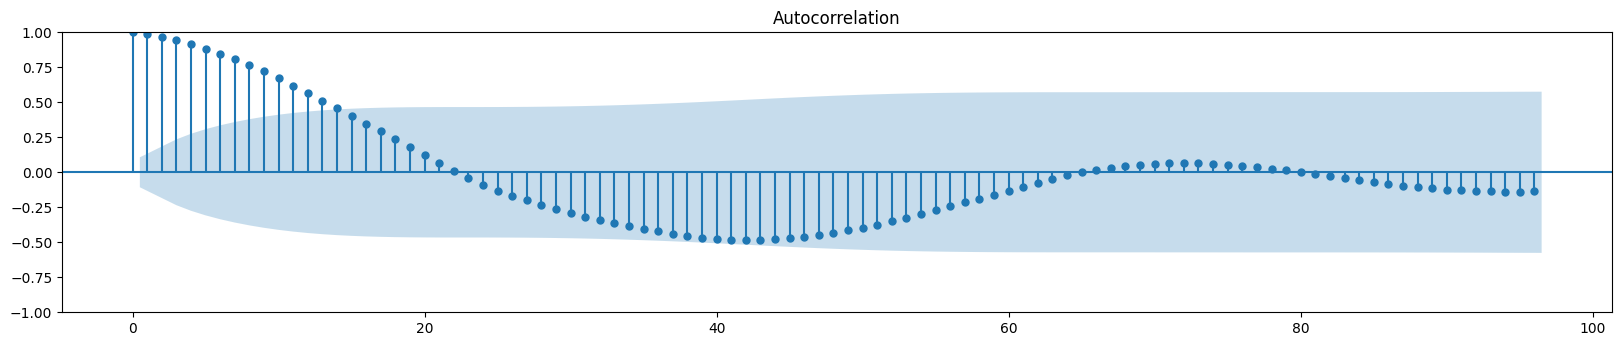

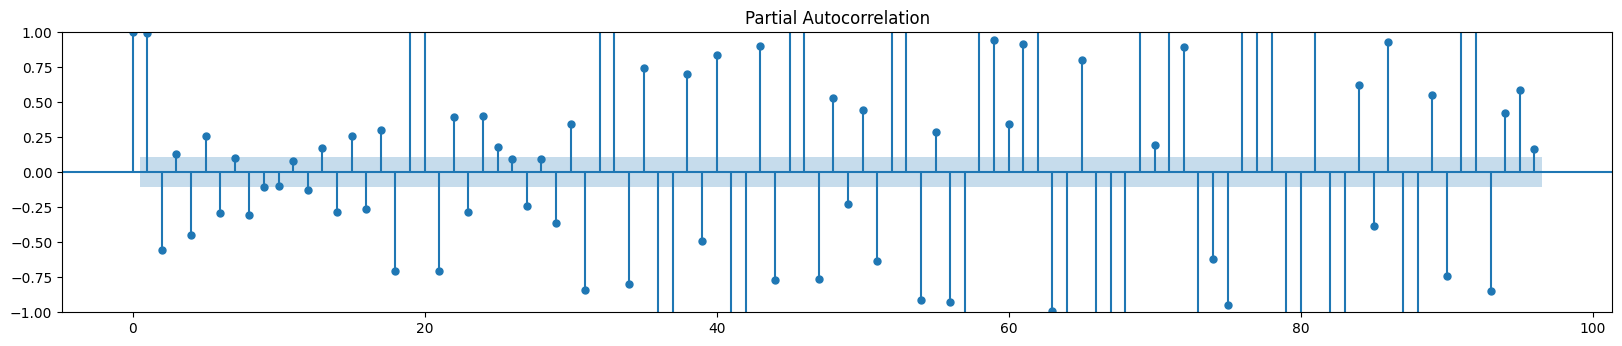

In [11]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train["trend"], lags=96, ax=ax1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train["trend"], lags=96, ax=ax1)

q=14, p=2

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from tqdm import tqdm

# ARIMA

In [13]:
p = range(0,3)
d = range(1,2)
q = range(0,16)

pdq = list(itertools.product(p,d,q))

aic = []
params = []

with tqdm(total = len(pdq)) as pg:
    for i in pdq:
        pg.update(1)
        try:
            model = SARIMAX(df_train["trend"], order=(i))
            model_fit = model.fit()
            # print("SARIMA:{}{}, AIC:{}".format(i,j, round(model_fit.aic,2)))
            aic.append(round(model_fit.aic,2))
            params.append((i))
        except:
            continue

  0%|          | 0/48 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 21%|██        | 10/48 [00:05<00:34,  1.11it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 33%|███▎      | 16/48 [00:24<01:23,  2.62s/it]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 42%|████▏     | 20/48 [00:30<00:43,  1.54s/it]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_re

In [14]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = ARIMA(df_train["trend"], order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  336
Model:                ARIMA(0, 1, 13)   Log Likelihood                1083.069
Date:                Thu, 27 Jul 2023   AIC                          -2138.137
Time:                        09:58:42   BIC                          -2084.740
Sample:                             0   HQIC                         -2116.849
                                - 336                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3987      0.044      9.046      0.000       0.312       0.485
ma.L2          0.2384      0.061      3.931      0.000       0.120       0.357
ma.L3          0.3038      0.059      5.185      0.000       0.189       0.419
ma.L4          0.1857      0.060      3.113      0.002       0.069       0.303
ma.L5          0.0690      0.061      1.132      0.258      -0.051       0.189
ma.L6          0.1304      0.058      2.239      0.025       0.016       0.244
ma.L7          0.0771      0.067      1.156      0.248      -0.054       0.208
ma.L8          0.2019      0.061      3.299      0.001       0.082       0.322
ma.L9          0.2591      0.063      4.095      0.000       0.135       0.383
ma.L10         0.1049      0.067      1.574      0.115      -0.026       0.236
ma.L11        -0.0886      0.067     -1.330      0.184      -0.219       0.042
ma.L12         0.0923      0.063      1.465      0.143      -0.031       0.216
ma.L13        -0.1723      0.061     -2.833      0.005      -0.291      -0.053
sigma2      9.038e-05   4.13e-06     21.896      0.000    8.23e-05    9.85e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):               556.89
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
model = ARIMA(df_train["trend"], order=optimal[0][0])
model_fit = model.fit()
forecast = model_fit.forecast(steps=12*8)

In [17]:
len(forecast)

96

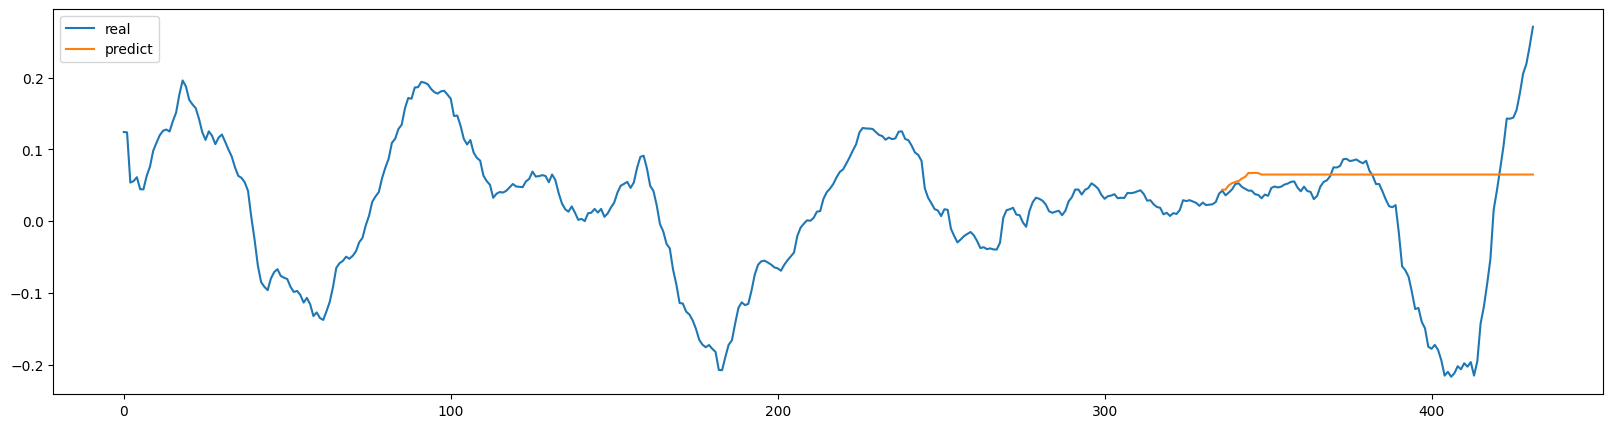

In [18]:


plt.figure(figsize=(20,5))
plt.plot(range(0,432), df["trend"].iloc[0:432], label="real")
plt.plot(forecast, label="predict")
plt.legend()
plt.show()

# SARIMAX

In [19]:
p = range(0,3)
d = range(1,2)
q = range(0,6)
m = 12*8

pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1], x[2], m) for x in list(itertools.product(p,d,q))]

aic = []
params = []

with tqdm(total = len(pdq) * len(seasonal_pdq)) as pg:
    for i in pdq:
        for j in seasonal_pdq:
            pg.update(1)
            try:
                model = SARIMAX(df_train["trend"], order=(i), season_order = (j))
                model_fit = model.fit()
                # print("SARIMA:{}{}, AIC:{}".format(i,j, round(model_fit.aic,2)))
                aic.append(round(model_fit.aic,2))
                params.append((i,j))
            except:
                continue

  0%|          | 0/324 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  1%|          | 2/324 [00:00<00:56,  5.70it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  1%|          | 3/324 [00:00<01:07,  4.74it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  1%|          | 4/324 [00:00<01:09,  4.62it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

In [20]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = SARIMAX(df_train["trend"], order = optimal[0][0][0], seasonal_order = optimal[0][0][1])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               trend   No. Observations:                  336
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 96)   Log Likelihood                 670.849
Date:                             Thu, 27 Jul 2023   AIC                          -1335.699
Time:                                     10:06:46   BIC                          -1325.269
Sample:                                          0   HQIC                         -1331.496
                                             - 336                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7751      0.065     11.956      0.000       0.648       0.902
ma.L1         -0.3354      0.091     -3.680      0.000      -0.514      -0.157
sigma2         0.0002   1.39e-05     15.356      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                40.37
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


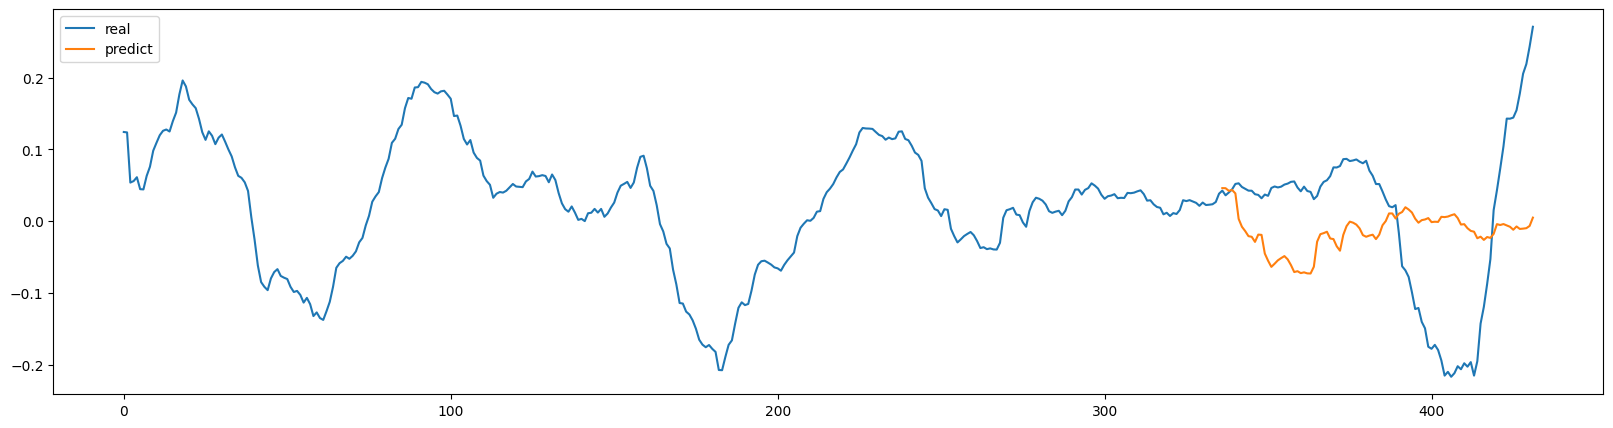

In [24]:
model = SARIMAX(df_train["trend"], order=optimal[0][0][0], seasonal_order=optimal[0][0][1])
model_fit = model.fit(disp=0)
forecast = model_fit.forecast(steps=12*8)

plt.figure(figsize=(20,5))
plt.plot(range(0,432), df["trend"].iloc[0:], label="real")
plt.plot(forecast, label="predict")
plt.legend()
plt.show()

In [ ]:
def MAPEval(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPEval(forecast, df["trend"].iloc[8*12:])

129.41682421653314

In [27]:
from sklearn.metrics import mean_squared_error
rmse_arima = np.sqrt(mean_squared_error(df_test['trend'], forecast))

In [28]:
rmse_arima

0.12586325003842186

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.9 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
auto_arima_model = auto_arima(df["trend"], start_p=1, start_q = 1, max_p=1, max_q=1, m=15, seasonal=True, d=1, D=1, max_P=2, max_Q=2, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (96) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2521.654, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2630.366, Time=1.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2674.560, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2689.561, Time=0.35 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.040 seconds


In [ ]:
prediction = auto_arima_model.predict(216, return_conf_int=True)
predicted_value = prediction[0]

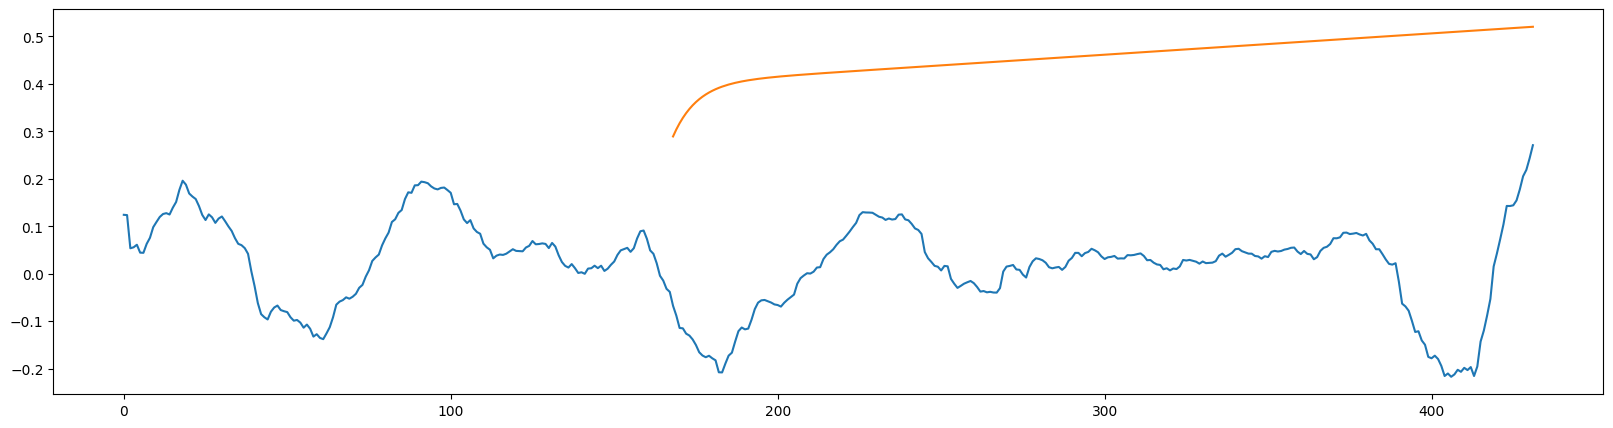

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(range(0,432), df["trend"].iloc[0:])
plt.plot(range(432-216,432),predicted_value)
plt.show()